# The realization of PLA:
- Reference: 
    - 李航 《统计学习方法》 第二版 第二章
    - 知乎：https://www.zhihu.com/question/26526858/answer/253579695
    
## generate linear separable data

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# weights: 直线法向量，numlines: 正整数，创造的数据点数量
def generate_data(weights, numlines):
    w = np.array(weights)
    features = len(w)
    dataset = np.zeros((numlines, features + 1))  # 行为数据点，列为特征的取值，最后一列为样本标签
    for i in range(numlines):
        x = np.random.rand(1, features) * 20 - 10  # 生成一行数据，范围是-10~10
        inner_product = np.sum(w * x)
        if inner_product <= 0:
            dataset[i] = np.append(x, -1)
        else:
            dataset[i] = np.append(x, 1)
    return dataset

In [99]:
def plot_dataset(dataSet):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Linear separable data set')
    plt.xlabel('X')
    plt.ylabel('Y')
    labels = np.array(dataSet[:,2])
    idx_1 = np.where(dataSet[:,2]==1)
    p1 = ax.scatter(dataSet[idx_1,0], dataSet[idx_1,1], marker='o', color='g', label=1, s=20)
    idx_2 = np.where(dataSet[:,2]==-1)
    p2 = ax.scatter(dataSet[idx_2,0], dataSet[idx_2,1], marker='x', color='r', label=2, s=20)
    plt.legend(loc = 'upper right')

## Sample Usage of Data Generator

In [100]:
data = generate_data([3,4], 100)

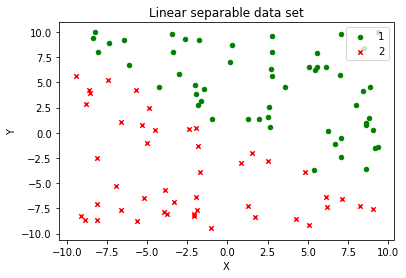

In [101]:
plot_dataset(data)
plt.show()

## Fit model
### Single Class

In [102]:
from sklearn.linear_model import Perceptron
X = data[:,:-1]
y = data[:, -1]

In [103]:
X,y

(array([[ 5.58520831,  7.88095211],
        [ 8.90463897,  4.55120551],
        [ 8.64436972,  0.79789707],
        [-6.96355312, -5.32089408],
        [-2.11424757, -8.20760637],
        [-9.15041639, -8.21601985],
        [ 2.76183435,  8.03162898],
        [-8.132518  , -7.03771475],
        [ 1.27508988,  1.37875305],
        [-3.37914451,  8.00973534],
        [ 9.22661907, -1.48034457],
        [-7.43598434,  5.24233991],
        [ 2.77699699,  5.59749369],
        [ 8.6446053 , -3.54864501],
        [-8.14225891, -8.65791742],
        [-1.67709162,  3.19936457],
        [-6.14726409,  6.76770285],
        [-1.83172665,  2.79271482],
        [ 1.72794393, -8.37957952],
        [-1.78720525,  9.21305919],
        [ 2.63222947,  0.6103958 ],
        [ 6.14656964,  6.48191994],
        [-3.3088386 , -6.89581313],
        [-5.34310112,  0.7684832 ],
        [-3.78812029, -8.02685051],
        [-1.99369243, -6.37336468],
        [-8.41416659,  9.36943916],
        [-8.81397083,  2.850

In [104]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_)
print(clf.intercept_)

1.0
[[19.95600803 22.99803049]]
[-10.]


In [105]:
print(clf.coef_)
print(clf.intercept_)

[[19.95600803 22.99803049]]
[-10.]


- for single class: clf.coef_[0] is the weight vector and clf.intercept_[0] is the intercept

In [106]:
coefs = clf.coef_[0]
intercept = clf.intercept_[0]

- use the model

In [107]:
f = np.dot(X, coefs) + intercept
sign = np.where(f > 0, 1, 0)
print(sign, y)

[1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1
 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0] [ 1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.
 -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.
  1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.]


- or use api by sklearn:

In [108]:
clf.predict(X)

array([ 1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.])